In [254]:
# Import libarires
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OrdinalEncoder
import matplotlib.pyplot as plt
import matplotlib.patheffects as pe
import math

In [255]:
# Importing datasets
algo_ds_leaderboard = pd.read_csv("algo_ds_leaderboard.csv",sep=";")
algo_ds_info = pd.read_csv("algo_ds_info.csv")

## Data Cleaning:
---

In [256]:
algo_ds_info[["problem_id","max_score"]] = algo_ds_info[["problem_id","max_score"]].astype(np.int16)
algo_ds_info.head(10)

,problem_id,problem_type,problem_name,difficulty,skills,max_score
0,0,algorithms,day-of-the-programmer,Easy,Basic,15
1,1,algorithms,time-conversion,Easy,Basic,15
2,2,algorithms,sock-merchant,Easy,Basic,10
3,3,algorithms,utopian-tree,Easy,Basic,20
4,4,algorithms,append-and-delete,Easy,Basic,20
5,5,algorithms,taum-and-bday,Easy,Basic,25
6,6,algorithms,service-lane,Easy,Basic,20
7,7,algorithms,absolute-permutation,Medium,Intermediate,40
8,8,algorithms,insertionsort1,Easy,Basic,30
9,9,algorithms,pangrams,Easy,Basic,20


In [257]:
# Casting to appropriate datatypes
algo_ds_leaderboard[["problem_id","count"]] = algo_ds_leaderboard[["problem_id","count"]].astype(np.int16)
algo_ds_leaderboard["score"] = algo_ds_leaderboard["score"].astype(np.float16)
algo_ds_leaderboard.head()

,problem_id,problem_type,pl,country,score,count
0,0,algorithms,c,India,15.0,2100
1,0,algorithms,c,Germany,15.0,6
2,0,algorithms,c,Republic of Korea,15.0,8
3,0,algorithms,c,United Kingdom,15.0,5
4,0,algorithms,c,Indonesia,15.0,20


### Null Analysis:

- **Leaderboard Dataset:**

In [258]:
# Check nulls
algo_ds_leaderboard[(algo_ds_leaderboard.isnull() | (algo_ds_leaderboard == "Null")).sum(axis = 1) >= 1].head()

,problem_id,problem_type,pl,country,score,count
15,0,algorithms,c,Null,15.000000,17
68,0,algorithms,c,Null,13.351562,1
79,0,algorithms,c,Null,11.703125,1
85,0,algorithms,c,Null,10.500000,3
108,0,algorithms,c,Null,0.000000,1


In [259]:
# Percentage null in each column
((algo_ds_leaderboard.isnull() | (algo_ds_leaderboard == "Null"))).sum(axis = 0)/len(algo_ds_leaderboard)

problem_id      0.00000
problem_type    0.00000
pl              0.00000
country         0.01996
score           0.00000
count           0.00000
dtype: float64

In [260]:
# We can impute the country column since percentage of nulls does not exceed 2%
algo_ds_leaderboard.loc[(algo_ds_leaderboard.isnull() | (algo_ds_leaderboard == "Null")).sum(axis = 1) >= 1,"country"] =  algo_ds_leaderboard["country"].mode().values[0]

In [261]:
((algo_ds_leaderboard.isnull() | (algo_ds_leaderboard == "Null"))).sum(axis = 0)

problem_id      0
problem_type    0
pl              0
country         0
score           0
count           0
dtype: int64

- **Information Dataset:**

In [262]:
# Check nulls
algo_ds_info[(algo_ds_info.isnull() | (algo_ds_info == "Null")).sum(axis = 1) >= 1].head()

,problem_id,problem_type,problem_name,difficulty,skills,max_score
12,12,algorithms,count-strings,Hard,Null,80
13,13,algorithms,similar-strings,Advanced,Null,85
15,15,algorithms,maximizing-mission-points,Hard,Null,70
16,16,algorithms,playing-with-numbers,Hard,Null,70
18,18,algorithms,beautiful-path,Medium,Null,50


In [263]:
# Percentage null in each column
((algo_ds_info.isnull() | (algo_ds_info == "Null"))).sum(axis = 0)/len(algo_ds_info)

problem_id      0.00000
problem_type    0.00000
problem_name    0.00000
difficulty      0.00000
skills          0.54386
max_score       0.00000
dtype: float64

In [264]:
# Percentage of nulls in skills column is so high (exceed 50%!!) so let's drop it
algo_ds_info = algo_ds_info.drop("skills", axis = 1)

In [265]:
algo_ds_info.dtypes

problem_id       int16
problem_type    object
problem_name    object
difficulty      object
max_score        int16
dtype: object

In [266]:
algo_ds_info["difficulty"].to_numpy().reshape(1,-1)

array([['Easy', 'Easy', 'Easy', 'Easy', 'Easy', 'Easy', 'Easy', 'Medium',
        'Easy', 'Easy', 'Easy', 'Easy', 'Hard', 'Advanced', 'Medium',
        'Hard', 'Hard', 'Medium', 'Medium', 'Medium', 'Hard', 'Advanced',
        'Expert', 'Easy', 'Medium', 'Hard', 'Medium', 'Medium', 'Medium',
        'Hard', 'Medium', 'Expert', 'Hard', 'Medium', 'Hard', 'Advanced',
        'Expert', 'Medium', 'Hard', 'Medium', 'Advanced', 'Medium',
        'Medium', 'Medium', 'Medium', 'Easy', 'Easy', 'Easy', 'Medium',
        'Hard', 'Hard', 'Hard', 'Medium', 'Advanced', 'Expert',
        'Advanced', 'Advanced']], dtype=object)

## Data Wrangling:
---

- ### Ordinal Encoding for Difficulty Column:

In [267]:
algo_ds_info["difficulty"].unique().reshape(1,-1)

array([['Easy', 'Medium', 'Hard', 'Advanced', 'Expert']], dtype=object)

In [268]:
ordinal_encoder = OrdinalEncoder(categories=[['Easy', 'Medium', 'Hard', 'Advanced', 'Expert']])
algo_ds_info["difficulty"] = ordinal_encoder.fit_transform(algo_ds_info["difficulty"].to_numpy().reshape(-1,1))

In [269]:
# Casting to appropriate data type
algo_ds_info["difficulty"] = algo_ds_info["difficulty"].astype(np.int8)

In [270]:
algo_ds_info["difficulty"]

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     1
8     0
9     0
10    0
11    0
12    2
13    3
14    1
15    2
16    2
17    1
18    1
19    1
20    2
21    3
22    4
23    0
24    1
25    2
26    1
27    1
28    1
29    2
30    1
31    4
32    2
33    1
34    2
35    3
36    4
37    1
38    2
39    1
40    3
41    1
42    1
43    1
44    1
45    0
46    0
47    0
48    1
49    2
50    2
51    2
52    1
53    3
54    4
55    3
56    3
Name: difficulty, dtype: int8

- ### Merging two Datasets and Creating New Columns:

In [271]:
algo_ds_merged = algo_ds_leaderboard.merge(algo_ds_info, on=["problem_id","problem_type"],how="inner")[['problem_id', 'problem_name', 'problem_type', 'pl', 'country', 'score', 'count', 'difficulty', 'max_score']]
algo_ds_merged.head()

,problem_id,problem_name,problem_type,pl,country,score,count,difficulty,max_score
0,0,day-of-the-programmer,algorithms,c,India,15.0,2100,0,15
1,0,day-of-the-programmer,algorithms,c,Germany,15.0,6,0,15
2,0,day-of-the-programmer,algorithms,c,Republic of Korea,15.0,8,0,15
3,0,day-of-the-programmer,algorithms,c,United Kingdom,15.0,5,0,15
4,0,day-of-the-programmer,algorithms,c,Indonesia,15.0,20,0,15


In [272]:
algo_ds_merged["score_percentage"] = (algo_ds_merged["score"]/algo_ds_merged["max_score"]).astype(np.float16)
algo_ds_merged.head(10)

,problem_id,problem_name,problem_type,pl,country,score,count,difficulty,max_score,score_percentage
0,0,day-of-the-programmer,algorithms,c,India,15.0,2100,0,15,1.0
1,0,day-of-the-programmer,algorithms,c,Germany,15.0,6,0,15,1.0
2,0,day-of-the-programmer,algorithms,c,Republic of Korea,15.0,8,0,15,1.0
3,0,day-of-the-programmer,algorithms,c,United Kingdom,15.0,5,0,15,1.0
4,0,day-of-the-programmer,algorithms,c,Indonesia,15.0,20,0,15,1.0
5,0,day-of-the-programmer,algorithms,c,Bulgaria,15.0,3,0,15,1.0
6,0,day-of-the-programmer,algorithms,c,United States,15.0,42,0,15,1.0
7,0,day-of-the-programmer,algorithms,c,Brazil,15.0,8,0,15,1.0
8,0,day-of-the-programmer,algorithms,c,Sri Lanka,15.0,13,0,15,1.0
9,0,day-of-the-programmer,algorithms,c,Egypt,15.0,36,0,15,1.0


## Data Exploration:
---

- ### Exploring the Most Popular Programming Languages and their Effectiveness in solving challenges

In [273]:
# Number of times each programming language is used
pls_count = algo_ds_merged.groupby("pl")["count"].sum()
# Number of times each programming language was successful in solving the challenged (Got 100% score)
pls_success_count = algo_ds_merged[algo_ds_merged["score_percentage"] == 1].groupby("pl")["count"].sum()

In [274]:
# Common programming langauges in 'pls_success_count', 'pls_count'
common_indices = [x for x in pls_success_count.index.values if x in pls_count.index.values]

In [275]:
pls_count[common_indices].head()

pl
ada                58
bash              817
c               48956
clojure          1128
coffeescript       26
Name: count, dtype: int64

In [276]:
# Percentage of usage of each programming language
pls_rate = pls_count[common_indices]/sum(pls_count[common_indices].values)
pls_rate.head()

pl
ada             0.000112
bash            0.001577
c               0.094517
clojure         0.002178
coffeescript    0.000050
Name: count, dtype: float64

In [277]:
pls_success_count[common_indices].head()

pl
ada                20
bash              308
c               41553
clojure           985
coffeescript       13
Name: count, dtype: int64

In [278]:
# Percentage of problems successfully solved (Got 100% score) in each programming language 
pls_success_rate = pls_success_count[common_indices]/pls_count[common_indices]
pls_success_rate.head()

pl
ada             0.344828
bash            0.376989
c               0.848783
clojure         0.873227
coffeescript    0.500000
Name: count, dtype: float64

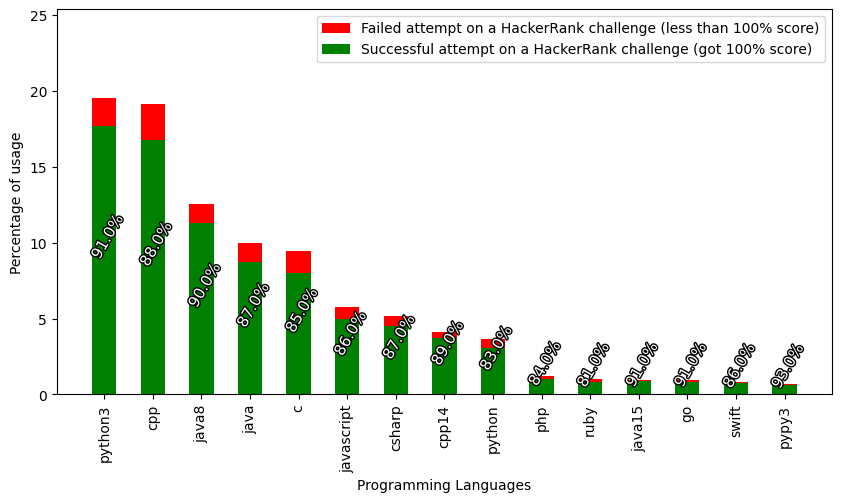

In [279]:
# Top m used programming languages
m1 = 15
plt.figure(figsize=(2*5,2*2.5))
y_pls_rate = pls_rate.sort_values(ascending=False)[0:m1]
plt.bar(x=y_pls_rate.index[0:m1],height=100*y_pls_rate ,width=0.5,color="red",label="Failed attempt on a HackerRank challenge (less than 100% score)")
success_rates_modified = pls_success_rate[pls_rate.sort_values(ascending=False)[0:m1].index.values]*pls_rate.sort_values(ascending=False)[0:m1]
plt.bar(x=success_rates_modified.index[0:m1],height=100*success_rates_modified,width=0.5,color="green",label="Successful attempt on a HackerRank challenge (got 100% score)")
plt.xticks(rotation=90,fontsize=10)
for i,p in enumerate(success_rates_modified):
    plt.text(x=i-0.1,y=p*0.5*100, s = f'{100*round(p/pls_rate.sort_values(ascending=False)[0:m1][i],2)}%', rotation=60,rotation_mode = "anchor",color = "white",fontsize=11,path_effects=[pe.withStroke(linewidth=2, foreground="black")])
plt.xlabel("Programming Languages")
plt.ylabel("Percentage of usage")
plt.ylim([0,100*max(pls_rate.sort_values(ascending=False)[0:m1])*1.3])
plt.legend()
plt.show()

In [280]:
# Spearman correlation
pd.DataFrame({"pls_rate":pls_rate,"pls_success_rate":pls_success_rate}).corr(method="spearman")

,pls_rate,pls_success_rate
pls_rate,1.000000,0.262489
pls_success_rate,0.262489,1.000000


**Comment:** We can see there's a weak correlation between popularity of a programming language and it's effectiveness in coding challenges

- ### Exploring Counteries by the Number of Challenges solved and how good were their solutions 

In [281]:
common_indices_2 = [x for x in algo_ds_merged.groupby("country")["count"].sum().index if x in algo_ds_merged[algo_ds_merged["score_percentage"] == 1].groupby("country")["count"].sum().index]
counteries_rate =  algo_ds_merged.groupby("country")["count"].sum()[common_indices_2]/sum(algo_ds_merged.groupby("country")["count"].sum()[common_indices_2])
counteries_success_rate = algo_ds_merged[algo_ds_merged["score_percentage"] == 1].groupby("country")["count"].sum()[common_indices_2]/algo_ds_merged.groupby("country")["count"].sum()[common_indices_2]
counteries_rate_m = counteries_rate.sort_values(ascending = False)[0:m2]
counteries_success_rate_m = counteries_success_rate[counteries_rate_m.index]

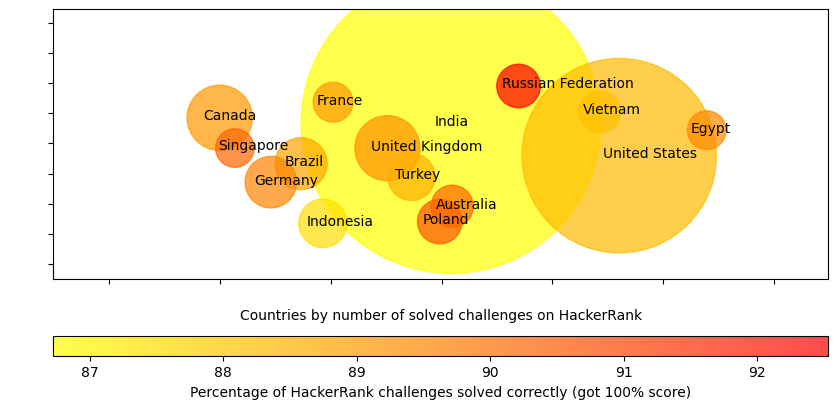

In [282]:
np.random.seed(1)
m2 = 15
plt.figure(figsize=(2*5,2*2.5))
x = np.random.rand(len(algo_ds_merged["country"].unique()))
y = np.random.rand(len(algo_ds_merged["country"].unique()))
cmap = plt.get_cmap("autumn").reversed()
plt.scatter(x[0:m2],y[0:m2],s=100000*counteries_rate_m,c= 100*counteries_success_rate_m,cmap=cmap,alpha = 0.7)
for i,p in enumerate(counteries_rate_m):
    plt.text(x=x[i] - 0.03,y=y[i] - 0.01, s = counteries_rate_m.index[i], color = "black",fontsize=10)
plt.ylim([-0.3,max(y)*1.5])
plt.xlim([-0.3,max(x)*1.1])
plt.xlabel("Countries by number of solved challenges on HackerRank")
plt.colorbar(label = "Percentage of HackerRank challenges solved correctly (got 100% score)",orientation = "horizontal",aspect = 40)
plt.xticks(color='w')
plt.yticks(color='w')
plt.show()
#plt.clim(0,1)

In [283]:
# Spearman correlation
pd.DataFrame({"counteries_rate":counteries_rate,"counteries_success_rate":counteries_success_rate}).corr(method="spearman")

,counteries_rate,counteries_success_rate
counteries_rate,1.000000,-0.413727
counteries_success_rate,-0.413727,1.000000


**Comment:** We can see negative medium correlaton between number of challenges solved by a country and the how good were their solutions (So counteries with fewer solved challenges, did surprisingly better)

- ### Exploring the Average Score as algorthims challenges are solved sequentially (gets harder)

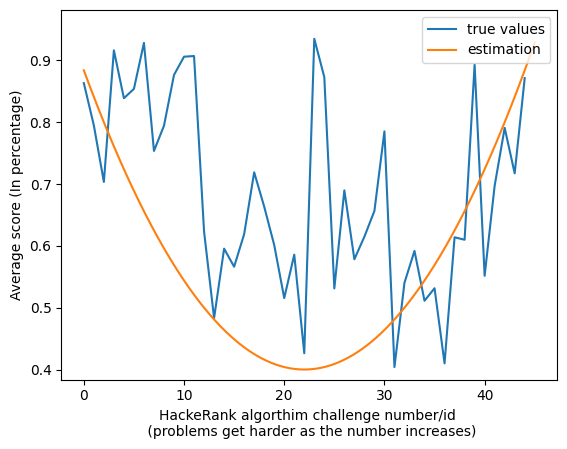

In [284]:
def probabla(x):
    return (1/1000)*math.pow(x - 22,2) + 0.4
len_algos = len(algo_ds_merged[algo_ds_merged["problem_type"] == "algorithms"].groupby("problem_id"))
problem_id_avg_score = algo_ds_merged[algo_ds_merged["problem_type"] == "algorithms"].groupby("problem_id")["score_percentage"].mean()
plt.plot(problem_id_avg_score,label = "true values")
X = np.linspace(0,len_algos,500)
plt.plot(X,[probabla(x) for x in X],label = "estimation")
plt.xlabel("HackeRank algorthim challenge number/id \n (problems get harder as the number increases)")
plt.ylabel("Average score (In percentage)")
plt.ylim((min(problem_id_avg_score)*0.95,max(problem_id_avg_score)*1.05))
plt.legend(loc = "upper right")

**Comment:** We can see that average score starts out very high (Since problems start out very simple on hackerrank) then  average score starts to decline as we reach the problems in the middle (Which makes sense since things start getting harder and harder) then by the end, the average score rises again (Which implies that HackerRank users have devoloped their problem solving skills and are now used to solving hard coding challenges OR simply because those HackerRank users who make it to the end must be professtional enough to get such scores)